线性规划即问题可以转化为一系列的线性不等式求解最优解

![image1](./images/线性规划1.jpg)

注意：linprog原本是求解目标最小值问题，这里最大值问题需要将系数取负

In [ ]:
from scipy.optimize import linprog

# 目标函数系数，这里是最大化问题，所以取负
c = [-4, -3]

# 不等式约束矩阵A和向量b
# 小于号才为正数
A = [[2, 1], [1, 1], [0, 1]]
b = [10, 8, 7] # 资源向量

# 决策变量的边界，这里是x1 >= 0, x2 >= 0
x0_bounds = (0, None)
x1_bounds = (0, None)

# 求解线性规划问题
res = linprog(c, A_ub=A, b_ub=b, bounds=[x0_bounds, x1_bounds])

# 输出结果
print('最优值:', -res.fun)  # 因为目标函数取负了，这里还原
print('最优解:', res.x)

最优值: 26.0
最优解: [2. 6.]


## 包含等式求解
#### 目标函数
maxz = 2x1+3x2-5x3
#### 约束条件
x1+x2+x3=7

2x1-5x2+x3 >= 10

x1+3x2+x3 <= 12

x1,x2,x3 >= 0


In [ ]:
from scipy.optimize import linprog
import numpy as np

# 目标函数系数（最大化转为最小化：-2x1 -3x2 +5x3）
c = [-2, -3, 5]

# 不等式约束矩阵 A 和向量 b
# 2x1 -5x2 +x3 ≥10 转换为 -2x1 +5x2 -x3 ≤-10；x1 +3x2 +x3 ≤12 保持不变
A = [[-2, 5, -1], [1, 3, 1]]
b = [-10, 12]

# 等式约束矩阵 Aeq 和向量 beq（x1 +x2 +x3 =7）
Aeq = [[1, 1, 1]]
beq = [7]

# 变量边界（x1, x2, x3 ≥0）
bounds = [(0, None), (0, None), (0, None)]

# 求解线性规划
result = linprog(c, A_ub=A, b_ub=b, A_eq=Aeq, b_eq=beq, bounds=bounds)



最优解：x1 = 6.4286, x2 = 0.5714, x3 = 0.0000
最优值（最大化目标函数 z）：14.5714


可以转化为线性规划的问题

如绝对值函数

min z = |x1| + 2|x2| + 3|x3|+ 4|x4|

u = (|x|+x)/2   v = ((|x|-x)/2)

|x| = u+v x= u-v

min z = u1+v1 + 2（u2+v2）+3(u3+v3)+4(u4+v4)

min z = u1+2u2+3u3+4u4+v1+2v2+3v3+4v4 



In [ ]:
from scipy.optimize import linprog
import numpy as np

# 目标函数系数（最大化转为最小化：-2x1 -3x2 +5x3）
c = [1,2,3,4,1,2,3,4]

# 不等式约束矩阵 A 和向量 b
# 2x1 -5x2 +x3 ≥10 转换为 -2x1 +5x2 -x3 ≤-10；x1 +3x2 +x3 ≤12 保持不变
A = [[1,-1,-1,1,-1,1,1,-1], [1,-1,1,-3,-1,1,-1,3],[1,-1,-2,3,-1,1,2,-3]]
b = [-2,-1,-0.5]


# 求解线性规划
result = linprog(c, A_ub=A, b_ub=b)

# 输出结果
print('最优值:', result.fun)  # 最2优值
print('最优解:', result.x)  # 最优解



最优值: 2.0
最优解: [0. 0. 0. 0. 2. 0. 0. 0.]


用pulp库求解这道题的线性规划问题


In [22]:
import pulp

# 创建最小化问题
prob = pulp.LpProblem("Minimize_z", pulp.LpMinimize)

# 定义变量
u1 = pulp.LpVariable('u1', lowBound=0)
v1 = pulp.LpVariable('v1', lowBound=0)
u2 = pulp.LpVariable('u2', lowBound=0)
v2 = pulp.LpVariable('v2', lowBound=0)
u3 = pulp.LpVariable('u3', lowBound=0)
v3 = pulp.LpVariable('v3', lowBound=0)
u4 = pulp.LpVariable('u4', lowBound=0)
v4 = pulp.LpVariable('v4', lowBound=0)

# 构建目标函数
prob += (u1 + v1) + 2 * (u2 + v2) + 3 * (u3 + v3) + 4 * (u4 + v4)

# 添加约束条件
prob += (u1 - v1) - (u2 - v2) - (u3 - v3) + (u4 - v4) <= -2
prob += (u1 - v1) - (u2 - v2) + (u3 - v3) - 3 * (u4 - v4) <= -1
prob += (u1 - v1) - (u2 - v2) - 2 * (u3 - v3) + 3 * (u4 - v4) <= -0.5

# 求解问题
prob.solve()

# # 输出结果
# print("Status:", pulp.LpStatus[prob.status])
# print("u1 =", pulp.value(u1))
# print("v1 =", pulp.value(v1))
# print("u2 =", pulp.value(u2))
# print("v2 =", pulp.value(v2))
# print("u3 =", pulp.value(u3))
# print("v3 =", pulp.value(v3))
# print("u4 =", pulp.value(u4))
# print("v4 =", pulp.value(v4))

# 计算原变量 x1, x2, x3, x4
x1 = pulp.value(u1) - pulp.value(v1)
x2 = pulp.value(u2) - pulp.value(v2)
x3 = pulp.value(u3) - pulp.value(v3)
x4 = pulp.value(u4) - pulp.value(v4)

print("最优解；")
print("x1 =", x1)
print("x2 =", x2)
print("x3 =", x3)
print("x4 =", x4)
print(f"最优值 z = {pulp.value(prob.objective)}")

最优解；
x1 = -2.0
x2 = 0.0
x3 = 0.0
x4 = 0.0
最优值 z = 2.0


固定风险，优化收益

d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20248 (\N{CJK UNIFIED IDEOGRAPH-4F18}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 19982 (\N{CJK UNIFIED IDEOGRAPH-4E0E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30340 (\N{CJK UNIFIED IDEOGRAPH-7684}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
d:\Anaconda\Lib\site-packages\IPython\core\pylabtools.p

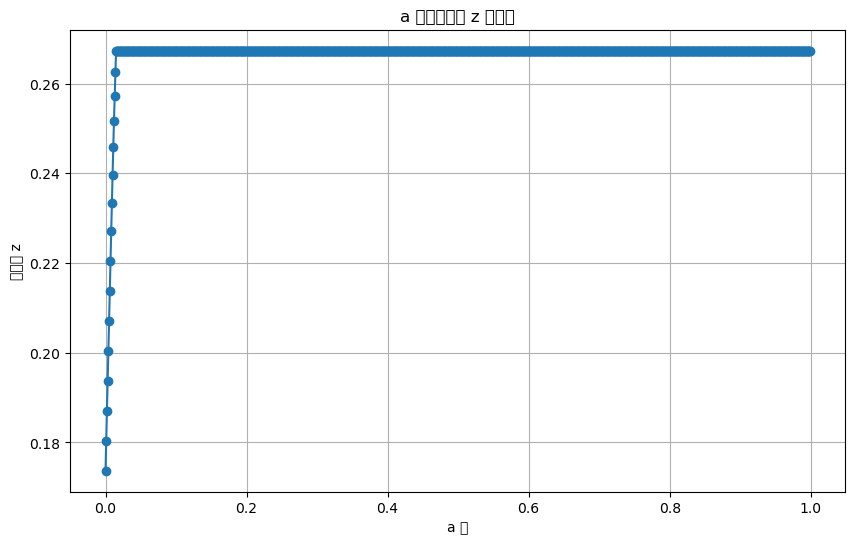

In [1]:
import pulp
import matplotlib.pyplot as plt

# 初始化存储 a 和最优值 z 的列表
a_values = []
z_values = []

# 从 a = 0 开始，步长为 0.001，假设遍历到 a = 1 结束
for a in [i * 0.001 for i in range(1000)]:
    # 创建线性规划问题对象，这里是最大化问题
    prob = pulp.LpProblem("Max_Cost", pulp.LpMaximize)

    # 定义决策变量
    x1 = pulp.LpVariable('x1', lowBound=0)
    x2 = pulp.LpVariable('x2', lowBound=0)
    x3 = pulp.LpVariable('x3', lowBound=0)
    x4 = pulp.LpVariable('x4', lowBound=0)
    x5 = pulp.LpVariable('x5', lowBound=0)

    # 定义目标函数
    prob += 0.05 * x1 + 0.27 * x2 + 0.19 * x3 + 0.185 * x4 + 0.185 * x5

    # 添加约束条件
    prob += x1 + 1.01 * x2 + 1.02 * x3 + 1.045 * x4 + 1.065 * x5 == 1.0
    prob += 0.025 * x1 <= a
    prob += 0.015 * x2 <= a
    prob += 0.055 * x3 <= a
    prob += 0.026 * x4 <= a

    # 求解线性规划问题
    prob.solve()

    # 存储 a 的值
    a_values.append(a)

    # 若求解成功，存储最优值 z，否则存储 None
    if pulp.LpStatus[prob.status] == 'Optimal':
        z_values.append(pulp.value(prob.objective))
    else:
        z_values.append(None)

# 可视化 a 和最优值 z 的关系
plt.figure(figsize=(10, 6))
plt.plot(a_values, z_values, marker='o', linestyle='-')
plt.xlabel('a 值')
plt.ylabel('最优值 z')
plt.title('a 值与最优值 z 的关系')
plt.grid(True)
plt.show()
    

练习题1.3 

求工厂最大利润

使用pulp库来做，用linprog需要转化为矩阵，容易出错，比较麻烦

In [ ]:
import pulp

# 创建线性规划问题对象，这里是最小化问题
prob = pulp.LpProblem("Max_Cost", pulp.LpMaximize)

# 定义决策变量
x1 = pulp.LpVariable('x1', lowBound=0)
x2 = pulp.LpVariable('x2', lowBound=0)
x3 = pulp.LpVariable('x3', lowBound=0)
x4 = pulp.LpVariable('x4', lowBound=0)
x5 = pulp.LpVariable('x5', lowBound=0)
x6 = pulp.LpVariable('x6', lowBound=0)
x7 = pulp.LpVariable('x7', lowBound=0)
x8 = pulp.LpVariable('x8', lowBound=0)
x9 = pulp.LpVariable('x9', lowBound=0)

# 定义目标函数,直接列出算式
prob += (1.25 - 0.25) * (x1 + x2) + (2 - 0.35) * x8 + (2.8 - 0.5) * x9 - \
        (300 / 6000) * (5 * x1 + 10 * x6) - (321 / 10000) * (7 * x2 + 9 * x7 + 12 * x9) - \
        (250 / 4000) * (6 * x3 + 8 * x8) - (783 / 7000) * (4 * x4 + 11 * x9) - (200 / 4000) * 7 * x5

# 添加约束条件
prob += 5 * x1 + 10 * x6 <= 6000
prob += 7 * x2 + 9 * x7 + 12 * x9 <= 10000
prob += 6 * x3 + 8 * x8 <= 4000
prob += 4 * x4 + 11 * x9 <= 7000
prob += 7 * x5 <= 4000
prob += x1 + x2 == x3 + x4 + x5
prob += x6 + x7 == x8

# 求解线性规划问题
prob.solve()

# 输出结果
print("最优解：")
print(f"x1 = {pulp.value(x1)}")
print(f"x2 = {pulp.value(x2)}")
print(f"x3 = {pulp.value(x3)}")
print(f"x4 = {pulp.value(x4)}")
print(f"x5 = {pulp.value(x5)}")
print(f"x6 = {pulp.value(x6)}")
print(f"x7 = {pulp.value(x7)}")
print(f"x8 = {pulp.value(x8)}")
print(f"x9 = {pulp.value(x9)}")
print(f"最优值 z = {pulp.value(prob.objective)}")

最优解：
x1 = 1200.0
x2 = 230.04926
x3 = 0.0
x4 = 858.62069
x5 = 571.42857
x6 = 0.0
x7 = 500.0
x8 = 500.0
x9 = 324.13793
最优值 z = 1146.5665012605712
